In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [499]:
df = pd.read_csv('/kaggle/input/australian-vehicle-prices/Australian Vehicle Prices.csv')

In [500]:
df.shape

(16734, 19)

In [501]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [503]:
df = df.dropna(how='all')

In [504]:
df = df.drop(['Car/Suv','Location','Title','ColourExtInt'],axis=1)

In [505]:
df['BodyType'] = df['BodyType'].fillna('Other')

In [506]:
def parse_to_int(x):
    value = str(x).strip().split(' ')[0]
    return int(value) if value != 'nan' and value != '-' else None
df['Doors'] = df['Doors'].apply(parse_to_int)

In [507]:
df['Doors'].isna().sum()

1603

In [508]:
df['Doors'] = df['Doors'].fillna(int(df['Doors'].mean())).astype(int)

In [509]:
df['Seats']= df['Seats'].apply(parse_to_int)
df['Seats'] = df['Seats'].fillna(int(df['Seats'].mean())).astype(int)

In [510]:
df = df[df['Price'] != 'POA']

In [511]:
df['Price'] = df['Price'].astype(float)
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [512]:
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,4 cyl,SUV,4,7,51990.0
1,MG,2022.0,MG3,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,4 cyl,Hatchback,5,5,19990.0
2,BMW,2022.0,430I,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,4 cyl,Coupe,2,4,108988.0
3,Mercedes-Benz,2011.0,E500,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,8 cyl,Coupe,2,4,32990.0
4,Renault,2022.0,Arkana,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,4 cyl,SUV,4,5,34990.0


In [513]:
df = df[~df['Kilometres'].isin(['-','Ssangyong','- / -'])]

In [514]:
df.shape

(16108, 15)

In [515]:
df['Kilometres'] = df['Kilometres'].astype(float)

In [516]:
df['CylindersinEngine'] = df['CylindersinEngine'].apply(parse_to_int)

In [517]:
df['CylindersinEngine'] = df['CylindersinEngine'].mean()
df['CylindersinEngine'] = df['CylindersinEngine'].fillna(df['CylindersinEngine'].mean())

In [520]:
df['Engine'] = df['CylindersinEngine'] / df['LitersInEngine']

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16108 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16108 non-null  object 
 1   Year               16108 non-null  float64
 2   Model              16108 non-null  object 
 3   UsedOrNew          16108 non-null  object 
 4   Transmission       16108 non-null  object 
 5   Engine             16108 non-null  float64
 6   DriveType          16108 non-null  object 
 7   FuelType           16108 non-null  object 
 8   FuelConsumption    16108 non-null  object 
 9   Kilometres         16108 non-null  float64
 10  CylindersinEngine  16108 non-null  float64
 11  BodyType           16108 non-null  object 
 12  Doors              16108 non-null  int64  
 13  Seats              16108 non-null  int64  
 14  Price              16108 non-null  float64
 15  LitersInEngine     16108 non-null  float64
dtypes: float64(6), int64(2), ob

In [523]:
def parse_fuel_consumption(x):
    splited = x.split(' ')
    if len(splited) >= 3:
        return float(splited[0]) / float(splited[3])
    return None
df['FuelConsumption'] = df['FuelConsumption'].apply(parse_fuel_consumption)
df['FuelConsumption'] = df['FuelConsumption'].fillna(df['FuelConsumption'].mean())

In [524]:
status = (pd.get_dummies(df['UsedOrNew'])*1).add_prefix('Status-')
df = df.join(status).drop('UsedOrNew',axis=1)

['Brand', 'Model', 'Transmission', 'DriveType', 'FuelType', 'BodyType']

In [525]:
brands = (pd.get_dummies(df['Brand'])*1).add_prefix('Brand-')
df = df.join(brands).drop('Brand',axis=1)

In [526]:
drive_types = (pd.get_dummies(df['DriveType'])*1).add_prefix('DriveType-')
df = df.join(drive_types).drop('DriveType',axis=1)

In [527]:
object_cols = df.select_dtypes('object').columns.to_list()
# Parsing to categorical (ordinal) variable
for col in object_cols:
    df[col] = df[col].apply(lambda x: df[df[col] == x]['Price'].mean())
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [528]:
df.corr()['Price'].apply(abs).sort_values(ascending=False)

Price                1.000000
Model                0.831225
Kilometres           0.398863
Year                 0.343246
FuelType             0.307546
                       ...   
Brand-Mini           0.001374
Brand-Datsun         0.001324
Brand-Rover          0.000881
Brand-Iveco          0.000279
CylindersinEngine         NaN
Name: Price, Length: 91, dtype: float64

In [529]:
x,y = df.drop('Price',axis=1),df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [530]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
tree_reg.score(x_test,y_test)

0.8557213107613397

In [531]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
linear_reg.score(x_test,y_test)

0.8329382537287957

In [538]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)
forest_reg.score(x_test,y_test)

0.9244538075046261

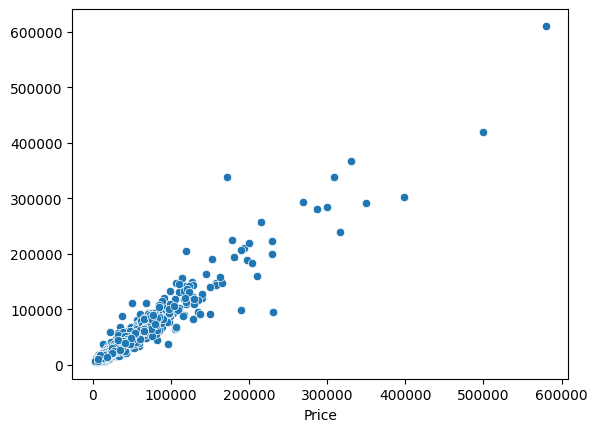

In [535]:
sns.scatterplot(x=y_test,y=y_preds)
plt.show()